<h1> Data Analysis the Family and Years of Service categories</h1>

<h2>Catarina </h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [2]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

<h2> Part 1: List the first few lines </h2>

In [3]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
df = df.drop(['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'], axis = 1)

In [5]:
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [6]:
dfCount = df.count()
dfCount

gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [7]:
#listing the columns relevant to my research
family_years_df = df[["family", "years_of_service"]]
family_years_df.head()



,family,years_of_service
0,1,22.0
1,2,10.0
2,1,7.0
3,2,14.0
4,1,4.0


In [8]:
family_years_df.describe()

,family,years_of_service
count,82.000000,80.000000
mean,1.621951,12.175000
std,0.487884,8.807038
min,1.000000,0.000000
25%,1.000000,3.750000
50%,2.000000,12.500000
75%,2.000000,18.250000
max,2.000000,36.000000


In [9]:
#Total count 
family_years_df.count()

family              82
years_of_service    80
dtype: int64

Text(0.5, 0, 'Years of service, n=80')

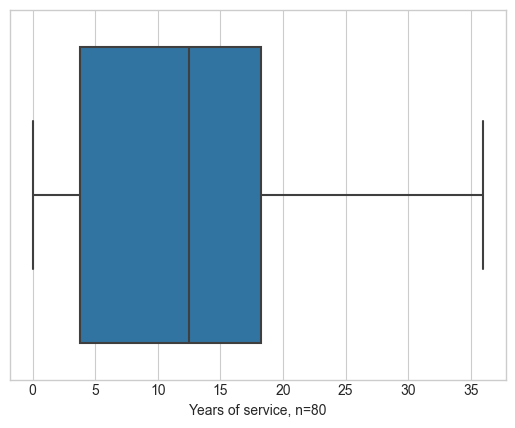

In [10]:
#Box plot for years of service
ax3 = sns.boxplot(x = family_years_df["years_of_service"])

#Creating the label for the box plot + adding sample size
ax3.set_xlabel('Years of service, n=' + str(family_years_df['years_of_service'].count()))

Text(0.5, 0, 'Civil status 1 = single 2= not single, n=82')

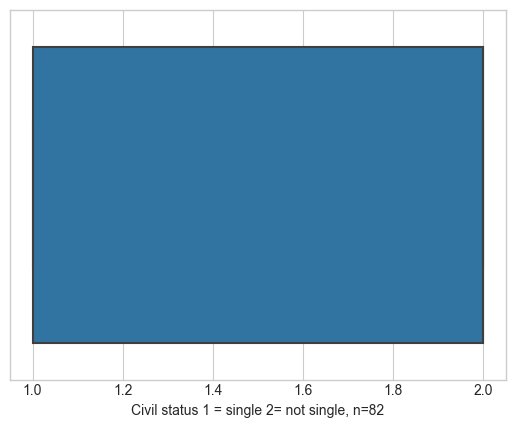

In [11]:
#Box plot for the family category. (for experimentation purposes)
ax3 = sns.boxplot(x = family_years_df["family"])

#Creating a label for the plot and adding sample size
ax3.set_xlabel('Civil status 1 = single 2= not single, n=' + str(family_years_df['family'].count()))

In [12]:
for var in family_years_df:
    print(var, family_years_df[var].unique())

family [1 2]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]


In [13]:
# Getting the largest value to appear in the first 3 rows
family_years_df.nlargest(n = 3, columns = 'years_of_service') 

,family,years_of_service
56,2,36.0
44,2,35.0
45,2,28.0


In [14]:
# Getting the smallest values to print in first 6 rows
family_years_df.nsmallest(n = 6, columns= "years_of_service")

,family,years_of_service
7,1,0.0
35,2,0.0
61,2,0.0
77,1,0.0
24,2,1.0
30,1,1.0


## Part: Investigate a few qualitative variables and generate frequency table(s) for their values

In [15]:

#Count of all unique values
years_of_service_df1 = pd.crosstab(family_years_df["years_of_service"], 'Count')

In [16]:
#Prints table counting each unique identifier
#years_of_service_df1.columns.name=''
years_of_service_df1.columns.name='Years of Service'
years_of_service_df1.columns.name=' '
#df_new = years_of_service_df1.rename(columns={'col_0': 'Years Of Service', 'years_of_service': ' '})
years_of_service_df1



,Count
years_of_service,
0.0,4
1.0,9
2.0,4
3.0,3
4.0,1
5.0,1
6.0,2
7.0,7
8.0,1


In [17]:
family_df2 = pd.crosstab(family_years_df['family'], 'Count')

#df2


#Adding .index at the makes it so we can also label each category
family_df2.index=['Single', 'Not single']

#Giving a name to the column so it does not appear as null or zero
family_df2.columns.name=''


family_df2

,Count
Single,31
Not single,51


In [18]:
family_df2 = pd.crosstab(family_years_df['family'], 'Count')
family_df2['%'] = family_df2['Count'] / family_df2['Count'].sum() * 100

family_df2.columns.name = ''
family_df2

,Count,%
family,,
1,31,37.804878
2,51,62.195122


<h2> Part: Draw a graphs based on the frequency tables</h2>

Text(0.5, 0, 'Count N= 82')

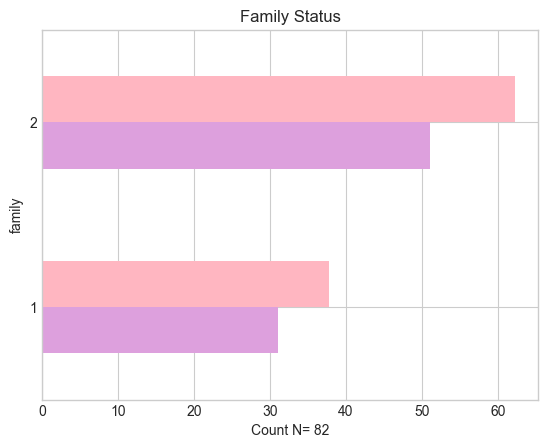

In [19]:
family_df2.plot.barh(legend = False, color = ['plum', 'lightpink'])

plt.title('Family Status')
plt.xlabel('Count N= 82')



In [20]:
sum(years_of_service_df1['Count'])

80

Text(0, 0.5, 'Years')

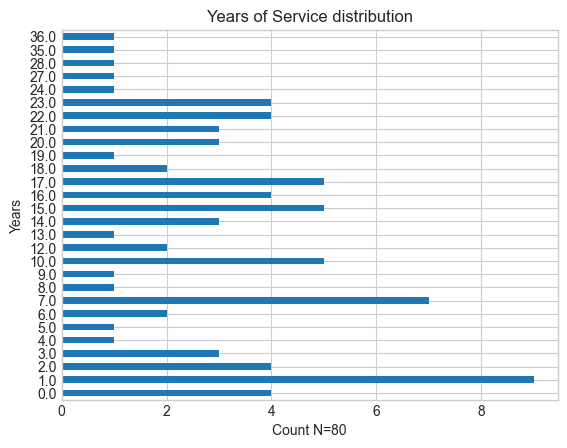

In [21]:

years_of_service_df1.plot.barh(legend = False)

#Add labels
plt.title('Years of Service distribution')
plt.xlabel('Count N=80')
plt.ylabel('Years')

## Part: Instead of using frequencies, use percentages

In [22]:
df2 = pd.crosstab(family_years_df["years_of_service"], 'Count')

df2['%'] = df2['Count'] / df2['Count'].sum() * 100

df2.columns.name = ''
df2

,Count,%
years_of_service,,
0.0,4,5.00
1.0,9,11.25
2.0,4,5.00
3.0,3,3.75
4.0,1,1.25
5.0,1,1.25
6.0,2,2.50
7.0,7,8.75
8.0,1,1.25


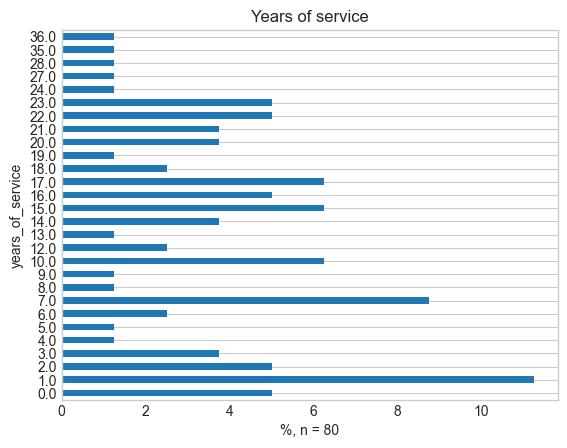

In [23]:
df2['%'].plot.barh(zorder = 2)

plt.title('Years of service')

plt.xlabel('%, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

## Part: Create some classification for quantitative variable

In [24]:
min(family_years_df["years_of_service"])

0.0

In [25]:
max(family_years_df["years_of_service"])

36.0

In [26]:
bins = [-1, 10, 20, 30, 41]


In [27]:
family_years_df

,family,years_of_service
0,1,22.0
1,2,10.0
2,1,7.0
3,2,14.0
4,1,4.0
...,...,...
77,1,0.0
78,1,2.0
79,1,7.0
80,2,16.0


In [ ]:
family_years_df["years_of_service_class"] = pd.cut(family_years_df["years_of_service"], bins = bins, right = False)

In [29]:
family_years_df

,family,years_of_service,years_of_service_class
0,1,22.0,"[20, 30)"
1,2,10.0,"[10, 20)"
2,1,7.0,"[-1, 10)"
3,2,14.0,"[10, 20)"
4,1,4.0,"[-1, 10)"
...,...,...,...
77,1,0.0,"[-1, 10)"
78,1,2.0,"[-1, 10)"
79,1,7.0,"[-1, 10)"
80,2,16.0,"[10, 20)"


In [30]:
years_of_service_class_df3 = pd.crosstab(family_years_df["years_of_service_class"], 'Count')

years_of_service_class_df3.columns.name = ''

# Percentages
n = years_of_service_class_df3['Count'].sum()
years_of_service_class_df3['%'] = years_of_service_class_df3 / n * 100

In [31]:
years_of_service_class_df3

,Count,%
years_of_service_class,,
"[-1, 10)",33,41.25
"[10, 20)",28,35.00
"[20, 30)",17,21.25
"[30, 41)",2,2.50


In [32]:
type(years_of_service_class_df3.index.values[0])

pandas._libs.interval.Interval

In [33]:
# Note, that income column has now values of type Interval!
# We would like to add row "Total" into the index, but the Index can contain only one type of values
# for that reason we need to change the type of index elements to be string!

years_of_service_class_df3.index = years_of_service_class_df3.index.astype(str)
#years_of_service_class_df3.loc['Total'] = years_of_service_class_df3.sum()
#years_of_service_class_df3

# Remove the existing 'Total' row if it exists
if 'Total' in years_of_service_class_df3.index:
    years_of_service_class_df3 = years_of_service_class_df3.drop('Total')

# Recalculate the 'Total' row
years_of_service_class_df3.loc['Total'] = years_of_service_class_df3.sum()

years_of_service_class_df3

,Count,%
years_of_service_class,,
"[-1, 10)",33.0,41.25
"[10, 20)",28.0,35.00
"[20, 30)",17.0,21.25
"[30, 41)",2.0,2.50
Total,80.0,100.00


In [34]:
# Finalizing the layout
years_of_service_class_df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
years_of_service_class,,
"[-1, 10)",33,41.2 %
"[10, 20)",28,35.0 %
"[20, 30)",17,21.2 %
"[30, 41)",2,2.5 %
Total,80,100.0 %


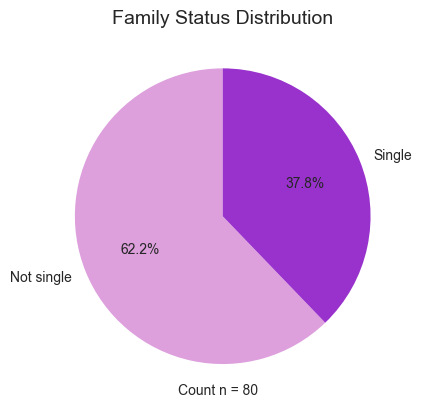

In [35]:

#family_df2.plot.barh(legend = False, color = ['plum', 'lightpink'])
family_counts = family_years_df['family'].value_counts()

#Labels for the category
labels = "Not single", "Single"

#Changing the color
colors = ['plum', 'darkorchid']

# Create a pie chart
# 1. Add df, 2. Add labels to the chart, 3. choose the chart colors, 4. Add the percentages into the chart, 5. Set the angle which it starts.
plt.pie(family_counts, labels= labels, colors = colors ,autopct='%1.1f%%', startangle=90)



# Set the title
plt.title('Family Status Distribution', fontsize = 14)

#Adding teh count information at the bottom
#After a lot of experimenting with the positions I managed to center the count
plt.text(-0.3, -1.2, f'Count n = 80')

# Display the pie chart
plt.show()

In [36]:
#Years of service Pie chart
service_pie_df = years_of_service_class_df3


## Part: Also create Histograms using the counts and using percentages

 - let's cover the counts part first

<Axes: xlabel='Years of service', ylabel='Count, n=80'>

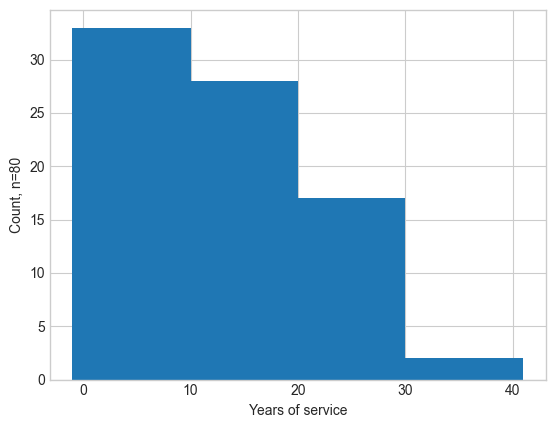

In [37]:
df4 = family_years_df['years_of_service'].hist(bins = bins)

plt.xlabel('Years of service')
plt.ylabel('Count, n=' + str(n))

df4


<Axes: xlabel='Years of service', ylabel='%, n=80'>

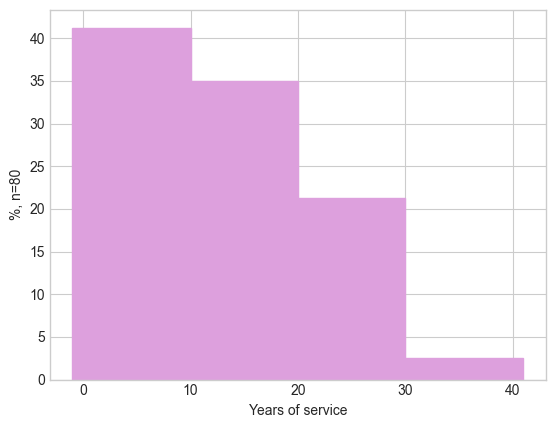

In [38]:
df5 = family_years_df["years_of_service"].hist(bins=bins, weights=np.ones(n) / n * 100, color="plum", edgecolor="plum")
plt.xlabel('Years of service')
plt.ylabel('%, n=' + str(n))

df5

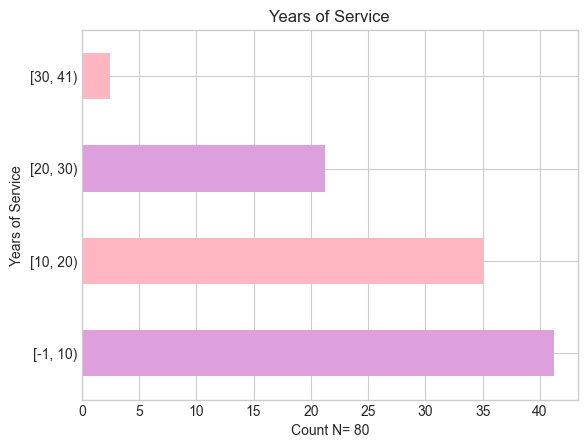

In [39]:
#Removing the Total Row from this barh chart
years_of_service_class_df3_filtered = years_of_service_class_df3[years_of_service_class_df3.index != 'Total']


years_of_service_class_df3_filtered.plot.barh(y='%', legend = False, color = ['plum', 'lightpink'] )



plt.title('Years of Service')
plt.xlabel('Count N= 80')
plt.ylabel('Years of Service')

plt.show()

## Part: Present the results of the cross-tabulations in tables and graphically

In [ ]:
# Use pd.cut to create a new column with the bin labels
family_years_df['years_of_service_class'] = pd.cut(family_years_df['years_of_service'], bins= bins)


df6 = pd.crosstab(family_years_df['years_of_service_class'] , family_years_df['family'], normalize = 'columns') * 100
#df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df6.columns = ['single', 'not single']
df6

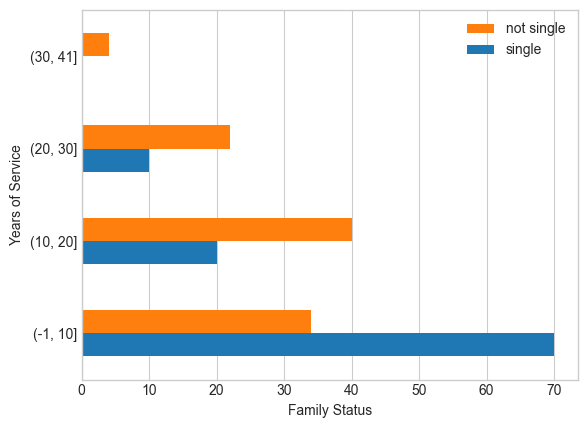

In [41]:
df6.plot.barh(legend = 'reverse')

plt.xlabel('Family Status')
plt.ylabel('Years of Service')

plt.grid(axis = 'y')

<h1> Analyzing variables in pairs </h1>


<h3> Family Status and Work Environment Satisfaction </h3>

In [42]:
CompareDf = pd.crosstab(df['family'], df['sat_workingEnvironment'])
CompareDf.index = ['single', 'not single']
CompareDf.columns = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']



CompareDf

,very unsatisfied,unsatisfied,neutral,satisfied,very satisfied
single,5,4,15,6,1
not single,4,5,15,17,10


In [43]:
from scipy.stats import chi2_contingency


chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=8.47270716126421, pvalue=0.07571884501720708, dof=4, expected_freq=array([[ 3.40243902,  3.40243902, 11.34146341,  8.69512195,  4.15853659],
       [ 5.59756098,  5.59756098, 18.65853659, 14.30487805,  6.84146341]]))

## Interpretation

Since the p-value is 0.07 it is not small enough to state the there would be some dependency in work satisfaction and family status.

<h3> Analyzing Years of Service and Work Environment Satisfaction </h3>

In [44]:
CompareDf = pd.crosstab(family_years_df['years_of_service_class'] , df['sat_workingEnvironment'])

CompareDf.columns = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

CompareDf

,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very satisfied
years_of_service_class,,,,,
"(-1, 10]",3,7,17,8,3
"(10, 20]",5,0,5,9,7
"(20, 30]",0,1,7,5,1
"(30, 41]",0,1,0,1,0


In [45]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=22.405704450997593, pvalue=0.03321654043434987, dof=12, expected_freq=array([[ 3.8  ,  4.275, 13.775, 10.925,  5.225],
       [ 2.6  ,  2.925,  9.425,  7.475,  3.575],
       [ 1.4  ,  1.575,  5.075,  4.025,  1.925],
       [ 0.2  ,  0.225,  0.725,  0.575,  0.275]]))

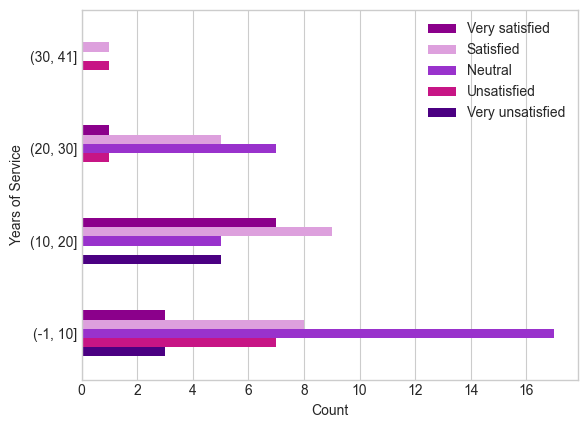

In [46]:
# Defining the colors 
colors = ['indigo','mediumvioletred','darkorchid', 'plum','darkmagenta']


CompareDf.plot.barh(legend = 'reverse', color = colors)

plt.xlabel('Count')
plt.ylabel('Years of Service')

plt.grid(axis = 'y')


<h3> Analyzing Years of Service and Salary Satisfaction </h3>

In [47]:
CompareDf = pd.crosstab(family_years_df['years_of_service_class'] , df['sat_salary'])
#CompareDf.index = []
CompareDf.columns = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']

CompareDf


,very unsatisfied,unsatisfied,neutral,satisfied,very satisfied
years_of_service_class,,,,,
"(-1, 10]",17,8,8,5,0
"(10, 20]",8,7,6,4,1
"(20, 30]",6,3,4,1,0
"(30, 41]",1,1,0,0,0


In [48]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=5.237418783125156, pvalue=0.949575081745614, dof=12, expected_freq=array([[15.2  ,  9.025,  8.55 ,  4.75 ,  0.475],
       [10.4  ,  6.175,  5.85 ,  3.25 ,  0.325],
       [ 5.6  ,  3.325,  3.15 ,  1.75 ,  0.175],
       [ 0.8  ,  0.475,  0.45 ,  0.25 ,  0.025]]))

## Interpretation

Since the p-value is 0.94 it is not small enough to state the there would be some dependency in years of service and salary satisfaction.

<h3> Analyzing Family Status and Salary Satisfaction </h3>

In [49]:
CompareDf = pd.crosstab(df['family'] , df['sat_salary'])
CompareDf.index = ['single', 'not single']
CompareDf.columns = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']

CompareDf

,very unsatisfied,unsatisfied,neutral,satisfied,very satisfied
single,17,6,5,3,0
not single,16,13,14,7,1


In [50]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=4.884957837639351, pvalue=0.2993065167615921, dof=4, expected_freq=array([[12.47560976,  7.18292683,  7.18292683,  3.7804878 ,  0.37804878],
       [20.52439024, 11.81707317, 11.81707317,  6.2195122 ,  0.62195122]]))

## Interpretation

Since the p-value is 0.29 it is not small enough to state the there would be some dependency in family status and Salary satisfaction.

<h3> Analyzing Family Status and Colleagues Satisfaction </h3>

In [51]:
# Checking for value 1 in sat_colleques
satC1 = pd.crosstab(df["sat_colleques"], 'Count')
satC1.index = satC1.index.astype(str)
satC1.loc['Total'] = satC1.sum()

satC1

col_0,Count
sat_colleques,
2.0,3
3.0,16
4.0,35
5.0,27
Total,81


In [52]:
CompareDf = pd.crosstab(df['family'] , df['sat_colleques'])
CompareDf.index = ['Single', 'Not single']
CompareDf.columns = [ 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']

CompareDf

,unsatisfied,neutral,satisfied,very satisfied
Single,2,6,14,9
Not single,1,10,21,18


In [53]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=1.3508709677419353, pvalue=0.7170901485565883, dof=3, expected_freq=array([[ 1.14814815,  6.12345679, 13.39506173, 10.33333333],
       [ 1.85185185,  9.87654321, 21.60493827, 16.66666667]]))

## Interpretation

Since the p-value is 0.71 it is not small enough to state the there would be some dependency in family status and Colleagues Satisfaction.

<h3> Analyzing Years of service and Colleagues Satisfaction </h3>

In [54]:
CompareDf = pd.crosstab(family_years_df['years_of_service_class'] , df['sat_colleques'])

CompareDf.columns = [ 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
CompareDf

,unsatisfied,neutral,satisfied,very satisfied
years_of_service_class,,,,
"(-1, 10]",1,7,19,11
"(10, 20]",2,4,10,10
"(20, 30]",0,4,5,5
"(30, 41]",0,0,0,1


In [55]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=5.676025533920271, pvalue=0.7718538575870764, dof=9, expected_freq=array([[ 1.44303797,  7.21518987, 16.35443038, 12.98734177],
       [ 0.98734177,  4.93670886, 11.18987342,  8.88607595],
       [ 0.53164557,  2.65822785,  6.02531646,  4.78481013],
       [ 0.03797468,  0.18987342,  0.43037975,  0.34177215]]))

Since the p-value is 0.771 it is not small enough to state the there would be some dependency in family status and Colleagues Satisfaction.

<h3> Analyzing Years of service and Job task Satisfaction </h3>

In [56]:
CompareDf = pd.crosstab(family_years_df['years_of_service_class'] , df['sat_tasks'])

CompareDf.columns = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
CompareDf

,very unsatisfied,unsatisfied,neutral,satisfied,very satisfied
years_of_service_class,,,,,
"(-1, 10]",2,6,18,8,4
"(10, 20]",3,4,5,11,3
"(20, 30]",0,3,6,5,0
"(30, 41]",0,0,0,1,1


In [57]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=14.330776748032088, pvalue=0.28008609322071376, dof=12, expected_freq=array([[ 2.375,  6.175, 13.775, 11.875,  3.8  ],
       [ 1.625,  4.225,  9.425,  8.125,  2.6  ],
       [ 0.875,  2.275,  5.075,  4.375,  1.4  ],
       [ 0.125,  0.325,  0.725,  0.625,  0.2  ]]))

Since the p-value is 0.28 it is not small enough to state the there would be some dependency in family status and Colleagues Satisfaction.

<h3> Analyzing Satisfaction with management and work environment Satisfaction </h3>

In [58]:
CompareDf = pd.crosstab(df['sat_management'] , df['sat_workingEnvironment'])


CompareDf.columns = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

CompareDf


,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very satisfied
sat_management,,,,,
1,3,3,0,1,0
2,3,4,5,3,1
3,3,1,18,6,2
4,0,1,7,11,4
5,0,0,0,2,4


In [59]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=53.16225138003493, pvalue=7.1007913649956596e-06, dof=16, expected_freq=array([[ 0.76829268,  0.76829268,  2.56097561,  1.96341463,  0.93902439],
       [ 1.75609756,  1.75609756,  5.85365854,  4.48780488,  2.14634146],
       [ 3.29268293,  3.29268293, 10.97560976,  8.41463415,  4.02439024],
       [ 2.52439024,  2.52439024,  8.41463415,  6.45121951,  3.08536585],
       [ 0.65853659,  0.65853659,  2.19512195,  1.68292683,  0.80487805]]))

Since the p-value is 7.10 it is not small enough to state the there would be some dependency in family status and Colleagues Satisfaction.

<h3> Analyzing Satisfaction with management and work environment Satisfaction </h3>

In [60]:


CompareDf = pd.crosstab(df['sat_management'] , df['sat_colleques'])



CompareDf.columns = ['Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

CompareDf

,Unsatisfied,Neutral,Satisfied,Very satisfied
sat_management,,,,
1,1,1,0,5
2,1,5,9,0
3,1,7,12,10
4,0,2,14,7
5,0,1,0,5


In [61]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=27.643835403726708, pvalue=0.006235110336018713, dof=12, expected_freq=array([[ 0.25925926,  1.38271605,  3.02469136,  2.33333333],
       [ 0.55555556,  2.96296296,  6.48148148,  5.        ],
       [ 1.11111111,  5.92592593, 12.96296296, 10.        ],
       [ 0.85185185,  4.54320988,  9.9382716 ,  7.66666667],
       [ 0.22222222,  1.18518519,  2.59259259,  2.        ]]))

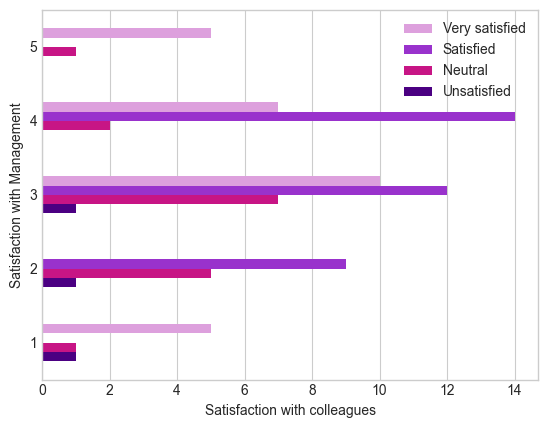

In [62]:
# Defining the colors 
colors = ['indigo','mediumvioletred','darkorchid', 'plum','darkmagenta']


CompareDf.plot.barh(legend = 'reverse', color = colors)



plt.xlabel('Satisfaction with colleagues')
plt.ylabel('Satisfaction with Management')

plt.grid(axis = 'y')

<h3> Analyzing Satisfaction with management and Family  </h3>

In [63]:
CompareDf = pd.crosstab(df['family'] , df['sat_management'])

CompareDf.index = ['Single', 'Not single']
CompareDf.columns = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

CompareDf


,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very satisfied
Single,4,7,13,6,1
Not single,3,9,17,17,5


In [64]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=4.227143957162107, pvalue=0.3761371786488699, dof=4, expected_freq=array([[ 2.64634146,  6.04878049, 11.34146341,  8.69512195,  2.26829268],
       [ 4.35365854,  9.95121951, 18.65853659, 14.30487805,  3.73170732]]))

Since the p-value is 0.37 it is not small enough to state the there would be some dependency in family status and Satisfaction with management.

<h3> Analyzing Satisfaction with tasks and Family status  </h3>

family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks 

In [65]:
CompareDf = pd.crosstab(df['family'] , df['sat_tasks'])
#CompareDf.index = ['Primary school', 'Secondary school graduate', 'Bachelor level', 'Master Level']
CompareDf.index = ['Single', 'Not single']
CompareDf.columns = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
CompareDf

,very unsatisfied,unsatisfied,neutral,satisfied,very satisfied
Single,3,9,13,4,2
Not single,2,6,16,21,6


In [66]:
from scipy.stats import chi2_contingency

chi2_contingency(CompareDf)

Chi2ContingencyResult(statistic=10.411669611114746, pvalue=0.0340357152085103, dof=4, expected_freq=array([[ 1.8902439 ,  5.67073171, 10.96341463,  9.45121951,  3.02439024],
       [ 3.1097561 ,  9.32926829, 18.03658537, 15.54878049,  4.97560976]]))

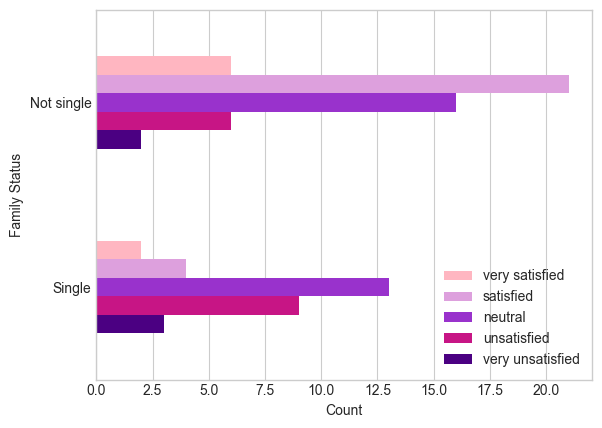

In [67]:
# Defining the colors 
colors = ['indigo','mediumvioletred','darkorchid', 'plum','lightpink']


CompareDf.plot.barh(legend = 'reverse', color = colors)

plt.xlabel('Count')
plt.ylabel('Family Status')

plt.grid(axis = 'y')

In [68]:
ageBins = [17, 20, 30, 40, 50, 60, 70]
df['age_class'] = pd.cut(df['age'], bins= ageBins)

<h1>Extra Extra Extra</h1>

1. Give an example how to use list comprehension in Python

List comprehension is a way to create lists. You can create a new list based on the values of an existing list.

In [69]:
# Create the list
color_list = ['red', 'blue', 'pink', 'violet', 'green', 'purple', 'yellow']

colors_with_L =[x for x in color_list if "l" in x]

print(colors_with_L)



['blue', 'violet', 'purple', 'yellow']


2. Explain what are the keyword arguments in Python

Keywords are specific words in python that are reserved, as in cannot be used as variable names. Those reserved words serve a pre-defined function, like for example break and if.


Some example of keywords used in this project:

bins = 'bin'
color = 'colors'
legend = False
Labels = 'label'

3. Give an example how to use slicing (that [:] thing) for WorkPlaceSatisfactionSurveyData

In [70]:
# An example of slicing of our data is for example the function nlargest
#which prints out the largest values
family_years_df.nlargest(n = 3, columns = 'years_of_service') 

,family,years_of_service,years_of_service_class
56,2,36.0,"(30, 41]"
44,2,35.0,"(30, 41]"
45,2,28.0,"(20, 30]"


In [71]:
#Here we used a special pandas function to slice and select rows that start at index 0 to 8 from the "years_of_service_class" column
selected_data = df.loc[0:8, "age_class"]
selected_data

0    (30, 40]
1    (20, 30]
2    (20, 30]
3    (30, 40]
4    (20, 30]
5    (30, 40]
6    (40, 50]
7    (50, 60]
8    (30, 40]
Name: age_class, dtype: category
Categories (6, interval[int64, right]): [(17, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]